## ¿Las ventas de consolas dependen de reseñas de usuarios y critica? #

Para este proyecto se realizan trabajos para la tienda online 'ICE' que distribuye videojuegos por todo el mundo.Tenemos a disposición los datos de las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. Realizaremos la identificación de patrones que determinen si un juego tiene éxito o no (Distribución Binomial). Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estamos planeando una campaña para 2017.

# Inicialización

[Importacion de Librerias necesarias]

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sidetable as stb
import seaborn as sns
from scipy import stats

## Cargar datos

Abrir el archivo de datos y estudia la información general.]

In [2]:
# Carga archivo de datos en DataFrames
data_raw = pd.read_csv('games.csv')

# Preparar los datos

## Muestreo de información de EDA

In [ ]:
# Funcion para visualizacion EDA (Análisis Exploratorio de Datos)
def EDA (data): 
    print('Primeras 5 filas')
    print(data.head())
    print()
    print('Informacion')
    print(data.info(show_counts=True))
    print()
    print('Valores nulos')
    print(data.isna().sum())
    print()
    print('Valores Duplicados')
    print(data.duplicated().sum())

In [4]:
# Mostrar información de data set
EDA(data_raw)

Primeras 5 filas
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to

**Descripción de datos**

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.



In [5]:
# Tabla de prueba de metricas para valores NaN (1)
data_raw.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


**Comentario:**
- En la revision preliminar del DataFrame se puede visualizar columnas con nombres diferentes con uso de mayúsculas y minúsculas, diferentes tipos de datos que no acordes a los valores de las columnas, varios valores ausentes en las diferentes columnas por lo cual se puede dar remplazo a las que no generen un alto porcentaje ya que estas no comprometerán los datos


## Normalizado de nombres de las columnas 

In [6]:
# Transformacion de nombres de columnas a minusculas
data_raw.columns = data_raw.columns.str.lower()
data_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# revision de valores de columna para cambio de formato
data_raw['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

## Tratamiento de valores NaN

In [8]:
# Completar valores NaN no representativos (nombre, genero, rating = desconocido y año = 2099)
data_clean = data_raw.fillna({'name': 'unknown', 
                              'genre': 'unknown', 
                              'rating': 'unknown',
                              'year_of_release' : '2099'})

# Tabla de prueba de metricas para valores NaN (2)
data_clean.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
user_score,"6,701","16,715",40.09%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%


**Comentario**
- Tomando en cuenta que en la revision preliminar EDA y una prueba de valores ausentes el porcentaje de ellos es relativamente al sin superar en 50% en la mayoría de casos se tomo las siguientes decisiones sobre las columnas.

**Columnas 'name', 'genre'** Al no tener valores numéricos que afecten en el análisis se procedió a rellenar con 'unknown'(desconocido).

 **Columna 'year_of_release'** Que representa un valor numero relacionado para identificar a otras columnas se cambio a '2099' un año superior con respecto a los valores ya registrados.

**Columna 'rating'** que maneja una clasificación ESRB no afecta el remplazo a 'unknown', pero al tener un porcentaje significativo de valores ausentes no es viable tomar esta métrica para análisis.

## Cambio de formato data type

In [9]:
# cambiar fromato de datos a enteros
data_clean['year_of_release'] = data_clean['year_of_release'].astype(int)

# tratar valores de columna para cambiar formato
data_clean.loc[data_clean['user_score'] == 'tbd', 'user_score'] = np.nan

# cambiar fromato de datos a flotantes, multiplocado por 10
data_clean['user_score'] = data_clean['user_score'].astype(float)* 10
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Comentario** 
- En la información preliminar se mostró varias columnas con tipos de datos no relacionados con sus valores de contenido, por lo cual el cambio.

**Columna 'year_of_release'** Al tener un tipo de dato flotante, podría interrumpir las métricas. El cambio a entero es mas viable ya que son números sin decimales.

 **Columna 'user_score'** Al tener tipo de dato objeto no se puede contabilizar los valores, al realizar el cambio a tipo flotante ya que mantiene valores con decimales. Se identifica que también tiene datos como string, mismos que se filtra y se con la librería NumPy se trata los strings como valores nulos.

## Enriquecimiento de los datos

In [10]:
# creacion de DataFrame limpio
data_clean.to_csv('clean_games.csv', index=False)

[Calculamos las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocamos estos valores en una columna separada.]

In [11]:
#EDA(data_clean)
# Filtro y suma de ventas totales
data_clean['total_sales'] = data_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Comentario** 
- Con los cambios realizados procedemos a generar un nuevo DataFrame con los datos limpios, de igual forma añadimos una nueva columna con la sumatoria de las ventas de las regiones.

# Análisis Estadístico

A continuación vamos a recabar información de datos para generar agrupaciones y graficos para mejor visualización del anaisis representativo segun planteamiento de ciertas preguntas 

## Datos poblacionales

### Ventas totales según año de lanzamiento

[Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?.]

In [12]:
# agrupacion de juego por año
game_of_the_year = data_clean.groupby('year_of_release').count()['name'].sort_values().reset_index()
game_of_the_year = game_of_the_year.query('year_of_release != 2099')
game_of_the_year.columns = ['year_of_release', 'total_games']
game_of_the_year.head()

,year_of_release,total_games
0,1980,9
1,1985,14
2,1984,14
3,1988,15
4,1987,16


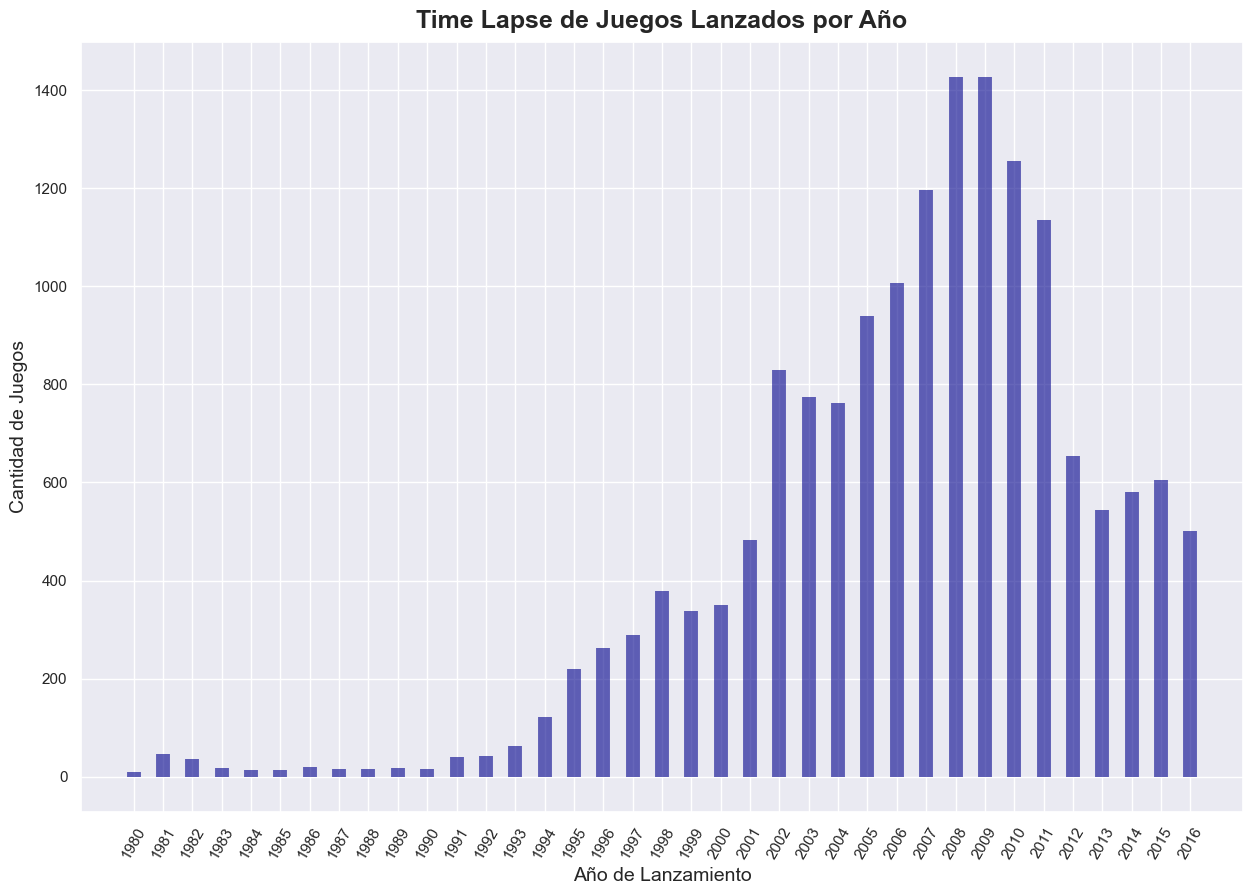

In [57]:
# Grafico para time lapse juegos lanzados por año
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=game_of_the_year.year_of_release, ymin=0, 
          ymax=game_of_the_year.total_games, alpha=0.6, linewidth=10, color='darkblue')
ax.set_xticks(game_of_the_year.year_of_release)
ax.set_xticklabels(game_of_the_year.year_of_release, rotation=60)

# Configurar títulos y etiquetas
plt.title("Time Lapse de Juegos Lanzados por Año", pad=10, fontsize=18, weight='bold')
plt.xlabel("Año de Lanzamiento", fontsize=14)
plt.ylabel("Cantidad de Juegos", fontsize=14)
plt.show()

**Comentario**
- En este caso creamos una nueva variable para identificar el crecimiento de las ventas totales por año, tomando en cuenta no tomar el remplazo del valor nulo que se relleno en la **columna 'year_of_release'**.

- Esta información da a conocer que el crecimiento de las ventas fue ascendente teniendo un pico en el 2008 y 2009 para decrecer a 2016 pero superan las ventas generadas antes del 2002.

### Ventas totales según Plataforma

In [14]:
# Agrupcion de plataforma por total de ventas
df_sales = data_clean.groupby('platform')['total_sales'].sum()
df_sales.head()

platform
2600     96.98
3DO       0.10
3DS     259.00
DC       15.95
DS      806.12
Name: total_sales, dtype: float64

In [15]:
df_sales = df_sales.sort_values(ascending=False).reset_index()

In [16]:
df_sales.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


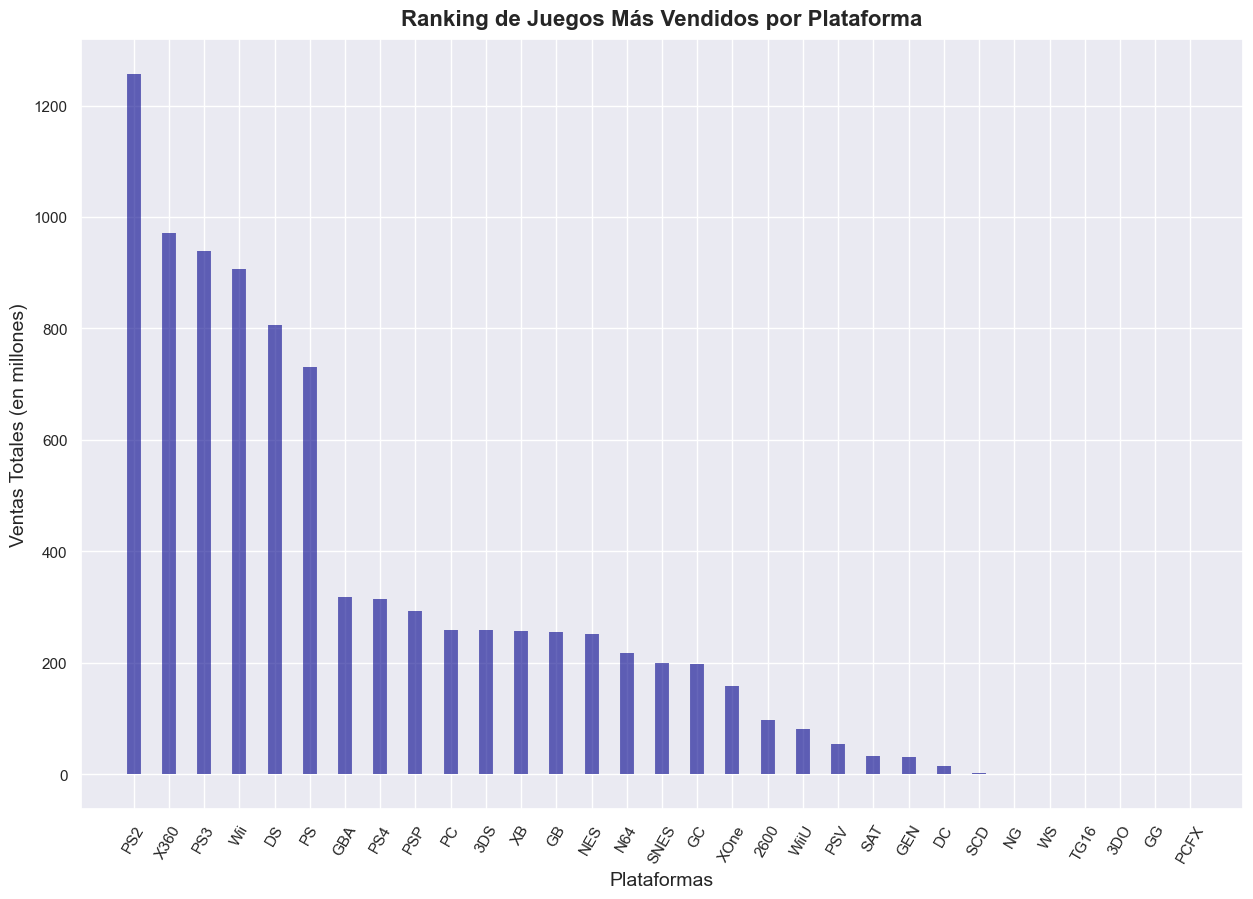

In [58]:
# Grafico para ranking de juegos mas vendidos segun plataforma
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=df_sales.platform, ymin=0, 
          ymax=df_sales.total_sales, alpha=0.6, linewidth=10, color='darkblue')
ax.set_xticks(df_sales.platform)
ax.set_xticklabels(df_sales.platform, rotation=60)

# Configurar títulos y etiquetas
ax.set_title('Ranking de Juegos Más Vendidos por Plataforma', pad=10,fontsize=16, fontweight='bold')
ax.set_xlabel('Plataformas', fontsize=14)
ax.set_ylabel('Ventas Totales (en millones)', fontsize=14)
plt.show()

**Comentario**
- En una nueva agrupación ya segmentada por plataformas de videojuegos se puede visualizar la popularidad en razón de ventas totales. Mismas que en un Top 6 serian PS2, X360, PS3, Wii, DS, PS(Ps1). la cuales superan los 400 millones de ventas.

- Para poder confirmar la información y tomar una muestra de agrupación para el análisis se realizara el calculo del número de desviaciones estándar de la media (z-score)

### Plataforma según mejor relación ventas

In [18]:
# Relación con la desviación media y estándar
df_sales['z_score'] = (df_sales['total_sales'] - df_sales['total_sales'].mean())/df_sales['total_sales'].std()

In [19]:
# bucle para cambio de color en lista de comprensión 
df_sales['color'] = ['grey' if score < 0 else 'darkblue' for score in df_sales['z_score']]

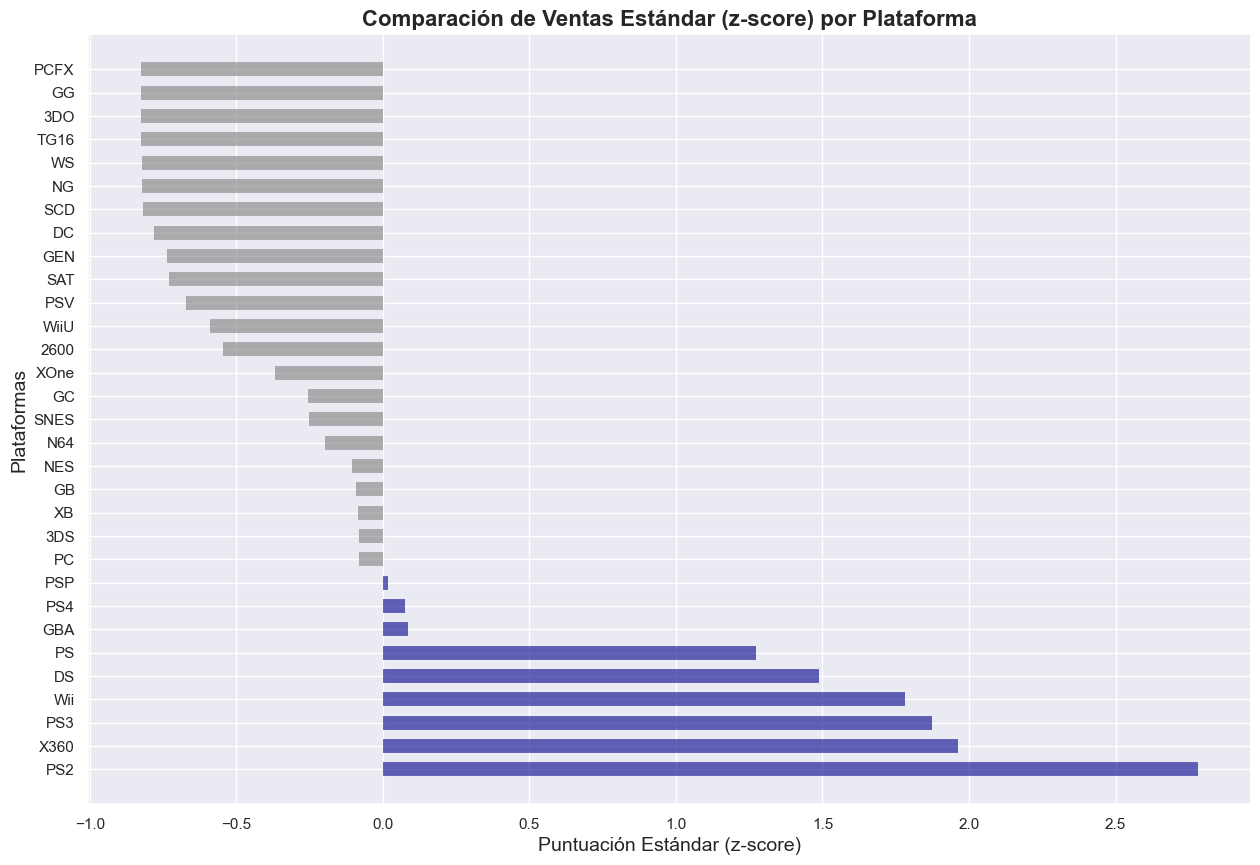

In [59]:
# grafico para comparación de puntuación estándar (z-score) de ventas entre plataformas
plt.figure(figsize=(15,10))
plt.hlines(
    y=df_sales.platform, xmax=df_sales.z_score, xmin=0, linewidth=10, alpha=0.6, color=df_sales.color)

# Configurar títulos y etiquetas
plt.title('Comparación de Ventas Estándar (z-score) por Plataforma',fontsize=16, fontweight='bold')
plt.xlabel('Puntuación Estándar (z-score)',fontsize=14)
plt.ylabel('Plataformas',fontsize=14)
plt.show()

**Comentario** 
- Con una nueva agrupación con la métrica z-core el top de plataformas varia añadiéndose GBA, PS4 y PSP a mejores ventas, pero manteniéndose los primeros lugares.

- A simple vista las plataformas de generaciones pasadas son las que menos relación de ventas tienen por lo cual puede depender su tiempo de vida, obviamente existen excepciones como XOne que esta en periodo reciente pero con baja relación de ventas.

### Tiempo de vida Plataforma según ventas anuales

In [21]:
# time lapse de ventas totales anuales por plataforma
df_lapse_p = data_clean.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum').fillna(0)

df_lapse_p.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,35.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,5.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Filatra filas de valores ausentes rellenados con año 2099
df_lapse_p = df_lapse_p[df_lapse_p.index != 2099]
#df_lapse_p.head()

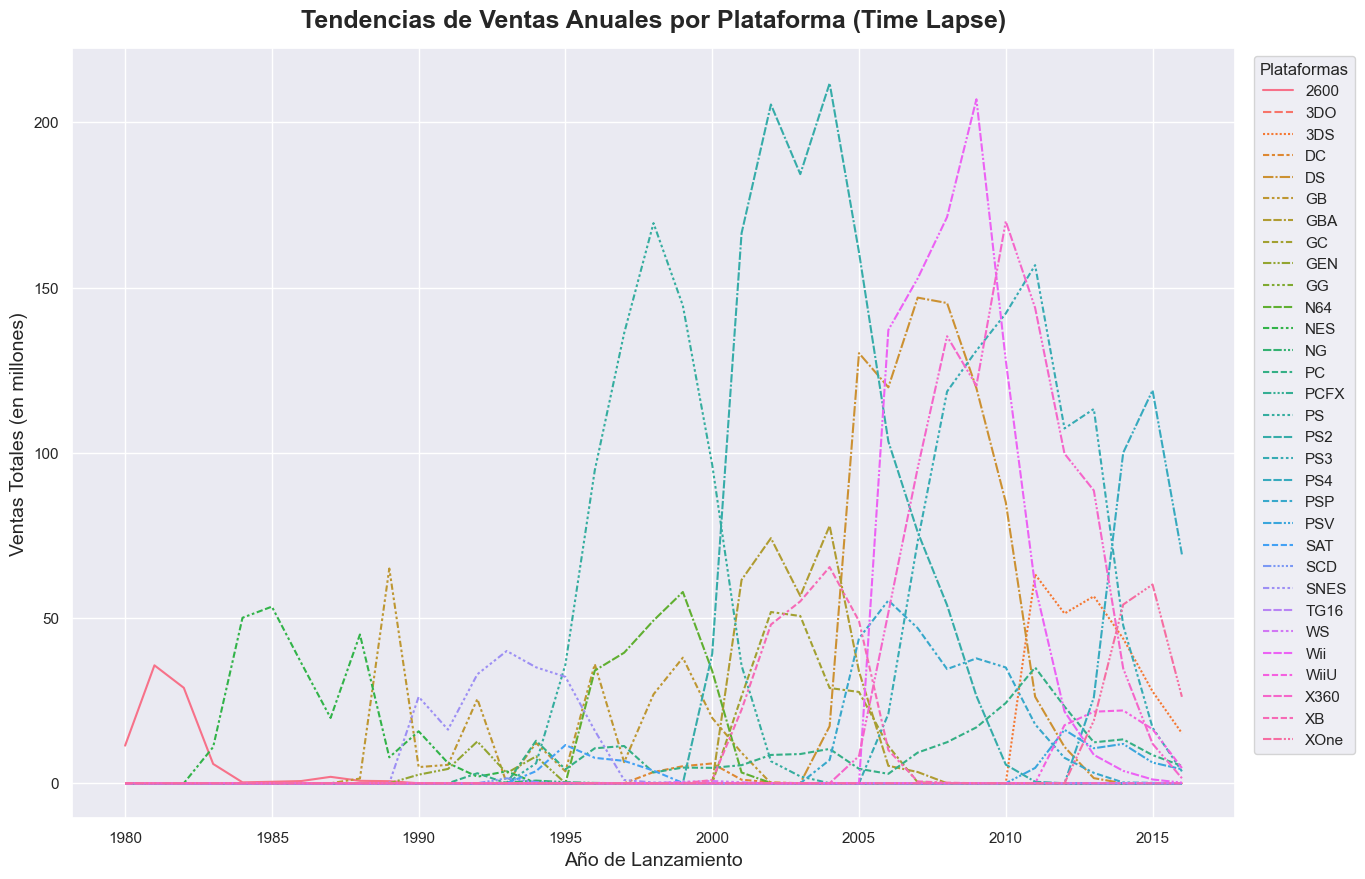

In [23]:
# Grafico de time lapse de plataformas por ventas anuales
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=df_lapse_p)

# Configurar títulos y etiquetas 
plt.title('Tendencias de Ventas Anuales por Plataforma (Time Lapse)', pad=15 ,fontsize=18, fontweight='bold')
plt.xlabel('Año de Lanzamiento',fontsize=14)
plt.ylabel('Ventas Totales (en millones)',fontsize=14)
plt.legend(title='Plataformas', bbox_to_anchor=(1.01, 1), loc='upper left')  # Separar leyenda
plt.grid(True)
plt.show()

**Comentarios** 
- Con un gráfico de Time lapse de las plataformas por año de lanzamiento en función de sus ventas. podemos identificar mayor movimiento al inicio de los 2000 con algunas excepciones y los picos convergen desde el 2005 por lo cual es razonable pensar que el tiempo de vida de una plataforma se relacionaban con sus ventas. Se tomara una muestra con un lapso de tiempo mas corto para mejor visualización de el tiempo de vida de las plataformas.

### Muestra de Plataformas en 10 años

[Determinaremos para qué período tomaremos los datos. Los datos nos deberían permitir construir un modelo para 2017.]

In [24]:
# filtro para grafico time lapse plataformas desde 2005
new_data = data_clean[data_clean.year_of_release >= 2005]

In [25]:
# time lapse de ventas totales anuales por plataforma 2005
df_lapse_p1 = new_data.pivot_table(
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum'
).fillna(0)

# Filtrar filas de valores ausentes rellenados con año 2099
df_lapse_p1 = df_lapse_p1[df_lapse_p1.index != 2099]

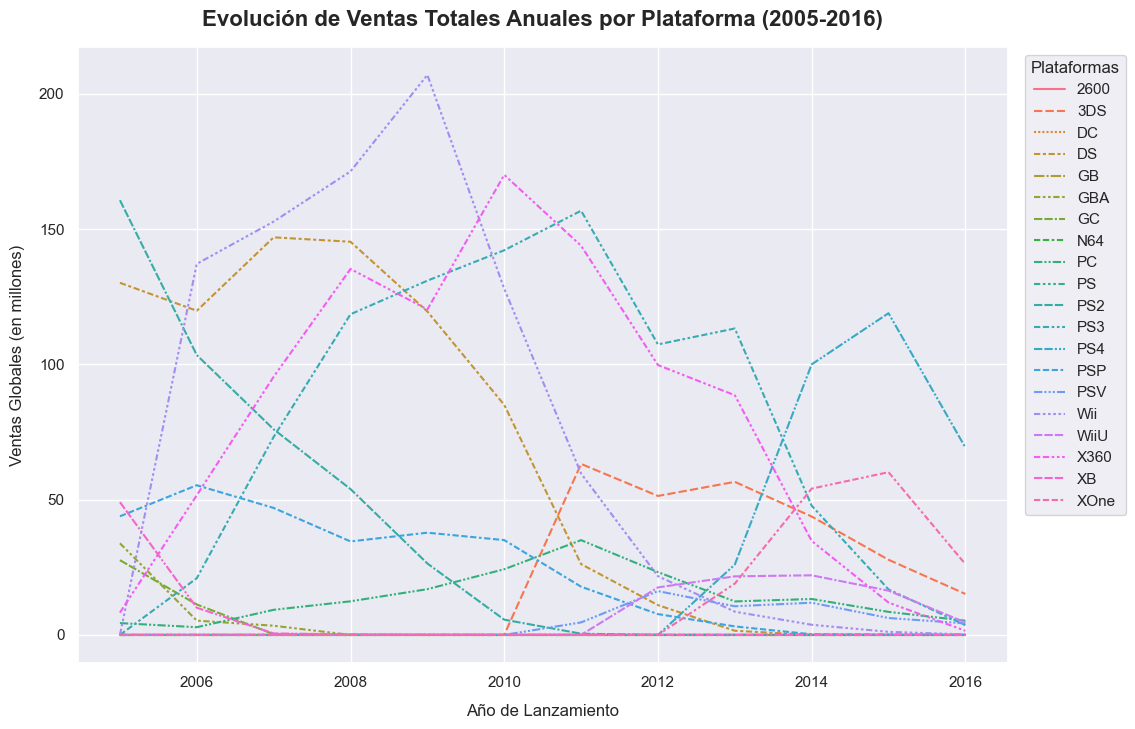

In [26]:
# Grafico time lapse plataformas desde 2005
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(data=df_lapse_p1)

# Configurar títulos y etiquetas
plt.title("Evolución de Ventas Totales Anuales por Plataforma (2005-2016)", pad=15, fontsize=16, fontweight='bold')
plt.xlabel("Año de Lanzamiento", labelpad=10)
plt.ylabel("Ventas Globales (en millones)", labelpad=10)
plt.legend(title='Plataformas', bbox_to_anchor=(1.01, 1), loc='upper left')  # Separar leyenda
plt.show()

**Comentario**
- Con un periodo de tiempo mas corto es decir 10 años desde el 2005 se puede considerar varios picos de ventas lo que indica que dominaron el mercado en ciertos períodos para PS2, PS3, Wii y DS.

- En contraste con las plataformas de primeras generaciones que no toman relevancia en años recientes, lo cual es una muestra de la obsolescencia en funcion de nuevas tecnologias. 

- Con esta información se pude tomar la agrupación del top 5 de plataformas para conocer su relación de ventas por año.

## Análisis de Muestras 

In [27]:
df_lapse_p1 # Ventas anuales por plataforma desde el 2005

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2005,0.0,0.00,0.00,130.14,0.0,33.86,27.62,0.0,4.37,0.0,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.0,0.00,0.00,119.81,0.0,5.28,11.26,0.0,2.85,0.0,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.0,0.00,0.02,146.94,0.0,3.40,0.27,0.0,9.28,0.0,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.0,0.00,0.04,145.31,0.0,0.00,0.00,0.0,12.42,0.0,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.0,0.00,0.00,119.54,0.0,0.00,0.00,0.0,16.91,0.0,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.0,0.00,0.00,85.02,0.0,0.00,0.00,0.0,24.28,0.0,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2011,0.0,63.20,0.00,26.18,0.0,0.00,0.00,0.0,35.03,0.0,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2012,0.0,51.36,0.00,11.01,0.0,0.00,0.00,0.0,23.22,0.0,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
2013,0.0,56.57,0.00,1.54,0.0,0.00,0.00,0.0,12.38,0.0,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96


[¿Qué plataformas son líderes en ventas? ¿Cuáles se crecen y cuáles se reducen?] 
- Usaremos las plataformas potencialmente rentables.

In [28]:
# Suma de las ventas totales por plataforma
total_sales = df_lapse_p1.sum().sort_values(ascending=False)
print("Ventas totales por plataforma (2005-2016):")
print(total_sales)

Ventas totales por plataforma (2005-2016):
platform
X360    961.24
PS3     931.34
Wii     891.18
DS      785.49
PS2     426.46
PS4     314.14
PSP     282.47
3DS     257.81
PC      167.79
XOne    159.32
WiiU     82.19
XB       59.85
PSV      53.81
GBA      42.54
GC       39.15
DC        0.06
PS        0.00
N64       0.00
GB        0.00
2600      0.00
dtype: float64


### Top de ventas por año

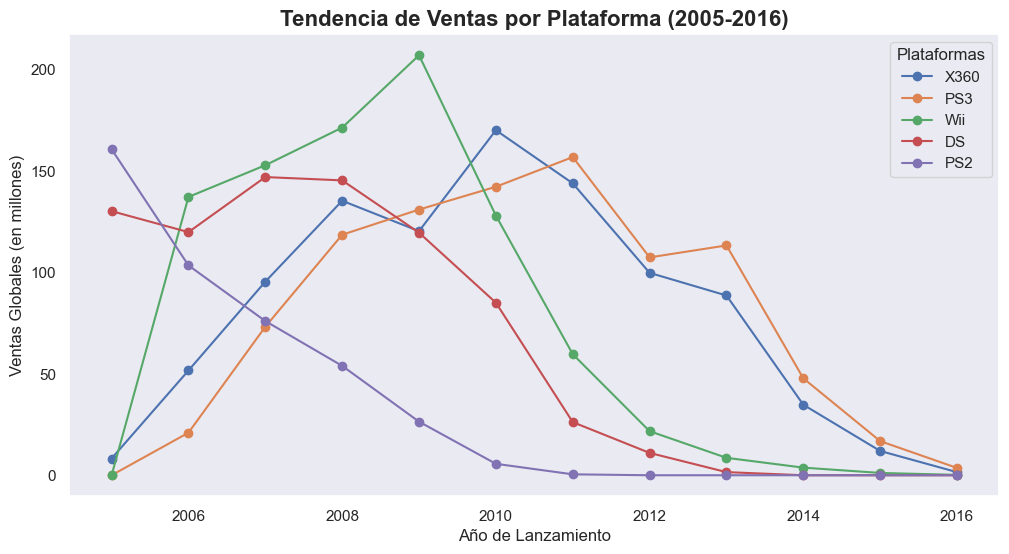

In [29]:
# Seleccionar plataformas principales para graficar
top_platforms = total_sales.head(5).index

# Graficar ventas año a año
df_lapse_p1[top_platforms].plot(figsize=(12, 6), marker='o')
plt.title("Tendencia de Ventas por Plataforma (2005-2016)",fontsize=16, fontweight='bold')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Globales (en millones)")
plt.legend(title="Plataformas")
plt.grid()
plt.show()

**Comentario**
- Con una muestra mas segmentada se puede identificar con claridad la relación de ventas por año de las plataformas mas populares donde el pico máximo mantiene Wii la cual podría deberse a su innovación por controles de moviendo y orientada a un publico mas casual.

- En el caso de PS2 es quien mejor se mantuvo en ventas por un periodo mas largo en consideración que es una plataforma de sexta generación pero se evidencia su caída inicios de  nueva generación como X360 y PS3 quienes se mantienen con un rango amplio por año de ventas sin llegar a los picos de Wii otra de séptima generación.

- DS al ser una plataforma de séptima generación pero portátil su publico es mas segmentado ya que no cuenta con la tecnología gráfica de plataformas de sobremesa por lo cual su declive es a mitad de su periodo de vida.

[¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?]

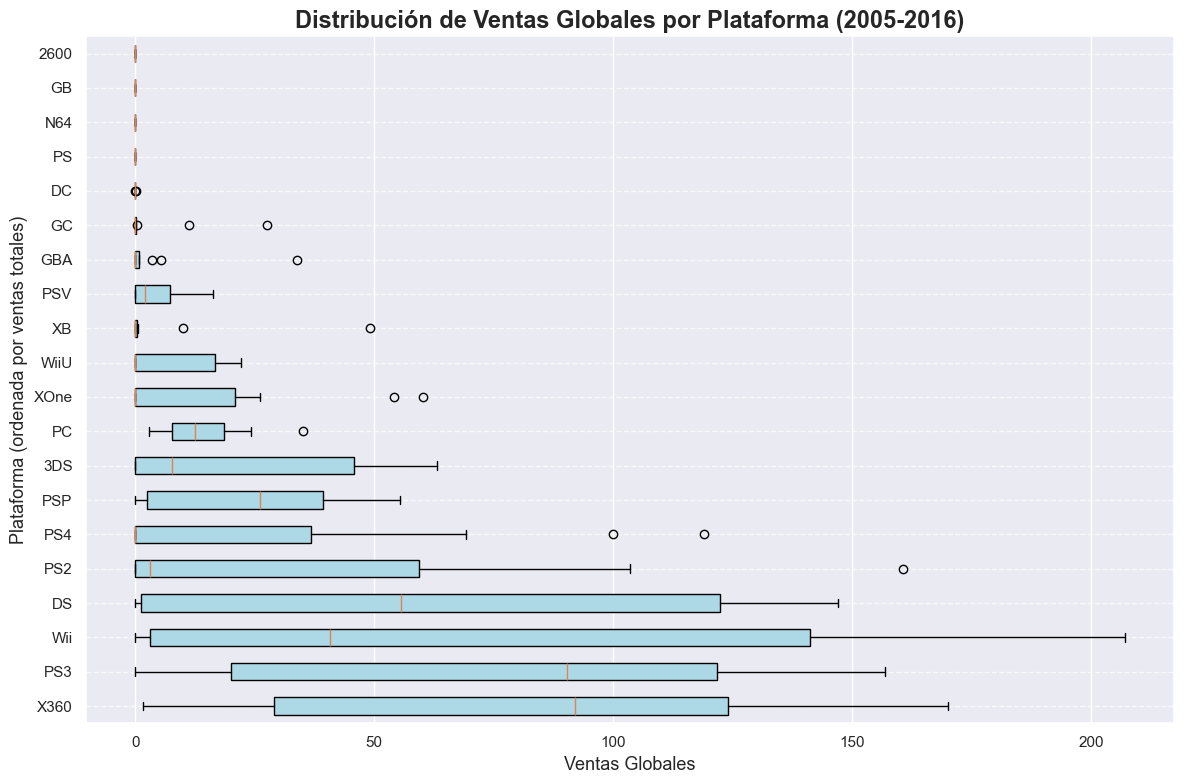

In [30]:
# Reordenar ventas totales por plataformma
ordered_columns = total_sales.index

# Crear el boxplot horizontal con orden
plt.figure(figsize=(12, 8))
plt.boxplot([df_lapse_p1[col].dropna() for col in ordered_columns], vert=False,
            patch_artist=True, showfliers=True, 
            boxprops=dict(facecolor='lightblue'), labels=ordered_columns)

# Configurar títulos y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma (2005-2016)',fontsize=17, fontweight='bold')
plt.xlabel('Ventas Globales',fontsize=13)
plt.ylabel('Plataforma (ordenada por ventas totales)',fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comentario** 
- Con esta visualización Wii, PS3 y X360 tiene la mayor cantidad de ventas globales entre el 2005 y 2016, reflejado en la amplitud de sus cajas y bigotes. Esto indica un alto rendimiento constante durante este periodo, también maneja varios valores atípicos que indican ventas muy altas.

- Si bien existe plataformas con ventas moderadas y otras bajas, todo recae en la séptima generación de consolas por lo cual generar juegos para ellas es altamente rentable hasta que se posicione la octava generación como PS4 y XOne.

[Miremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular.]

### Distribución por Reseñas (PS2)

In [31]:
# Filtrar los datos para la plataforma PS2
ps2_data = data_clean[data_clean['platform'] == 'PS2']

# Seleccionar las columnas relevantes: 'user_score', 'critic_score' y 'total_sales'
ps2_score = ps2_data[['user_score', 'critic_score', 'total_sales']]

# Eliminar filas con valores nulos en las reseñas de usuarios, reseñas de críticos y ventas
ps2_score = ps2_score.dropna(subset=['user_score', 'critic_score', 'total_sales'])
ps2_score.head()

,user_score,critic_score,total_sales
17,90.0,95.0,20.81
24,87.0,95.0,16.15
28,84.0,95.0,14.97
38,85.0,97.0,13.10
48,85.0,89.0,11.65


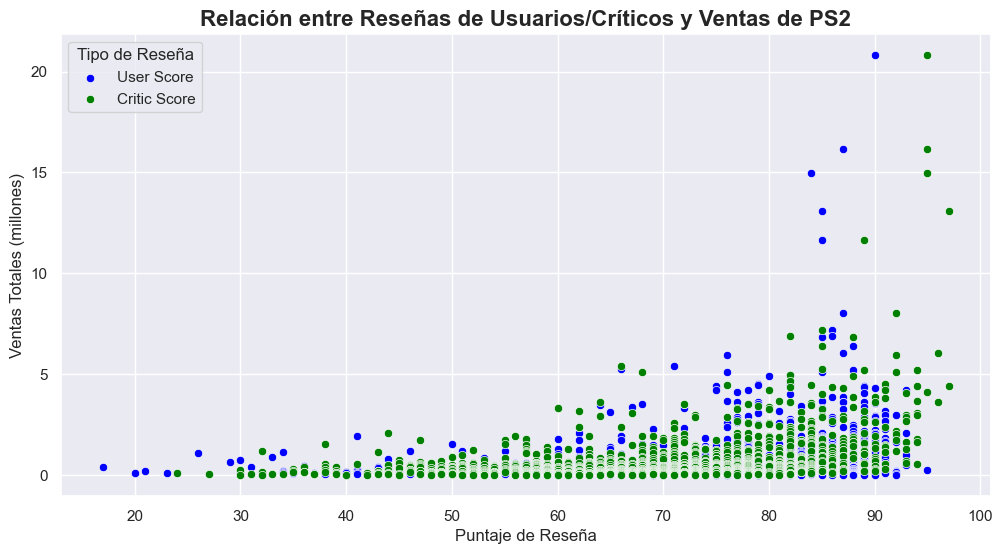

In [32]:
# Crear el gráfico de dispersión para user_score vs total_sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps2_data, x='user_score', y='total_sales', color='blue', label='User Score')

# Crear el gráfico de dispersión para critic_score vs total_sales
sns.scatterplot(data=ps2_score, x='critic_score', y='total_sales', color='green', label='Critic Score')

# Configurar títulos y etiquetas
plt.title("Relación entre Reseñas de Usuarios/Críticos y Ventas de PS2", fontsize=16, fontweight='bold')
plt.xlabel("Puntaje de Reseña")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Tipo de Reseña")
plt.show()

**Comentario**
- Con una muestra de juegos para la plataforma PS2, se observan las siguientes diferencias entre las reseñas de usuarios y críticos:

**Reseñas de Usuarios:** 
- Presentan una mayor dispersión, especialmente en puntajes altos (80-100), donde algunos juegos logran un impacto positivo en las ventas. Sin embargo, la relación no es tan evidente en rangos medios (50-70), mostrando menor consistencia en la influencia sobre las ventas.

**Reseñas de Críticos:** 
- La dispersión es mas uniforme y consistente por reseñas de criticos en nivees medios. Esto sugiere que las calificaciones de los críticos tienen una mayor relación con las ventas globales, incluso en puntajes medios (50-70).

[Revisemos el calcula la correlación entre las reseñas y las ventas.]

In [33]:
# Calcular la correlación entre las reseñas de usuarios y las ventas
correlacion1 = ps2_data['user_score'].corr(ps2_data['total_sales'])

correlacion2 = ps2_data['critic_score'].corr(ps2_data['total_sales'])

print(f"La correlación entre las reseñas de usuarios y las ventas de PS2 es:")
print(correlacion1)
print( )
print(f"La correlación entre las reseñas de criticos y las ventas de PS2 es:")
print(correlacion2)

La correlación entre las reseñas de usuarios y las ventas de PS2 es:
0.17286551112058193

La correlación entre las reseñas de criticos y las ventas de PS2 es:
0.39543454945454876


**Usuarios:** 
- La correlación de 0.17 entre las reseñas de usuarios y las ventas de PS2 indica una relación débil y positiva. Esto significa que, aunque hay una ligera tendencia a que los juegos con mejores reseñas de usuarios tienden a tener mayores ventas, la relación no es muy fuerte. Factores externos como falta de datos en reseñas pueden ser parte del resultado

**Críticos:** 
- La correlación de 0.39 entre reseñas de críticos tiene tendencia positiva mayor a la de los usuarios pero no es completamente relacionada con las ventas, podría decirse que existen otros factores o de igual forma necesita mas datos de reseñas por juegos para determinar un resultado concretó.

### Correlación de muestra con otras Plataformas

[Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.]

In [34]:
# Filtrar nommbres solo de PS2
ps2_games = ps2_data['name'].unique()

# Filtrar df principal nombres ps2 en df plataforma nombres ps2, Pivotarían para el total de valores
sales_pivot = data_clean[data_clean['name'].isin(ps2_games)] \
    .pivot_table(index='name', columns='platform', values='total_sales')
#
# Calcular la correlación de PS2 con otras plataformas
correlation = sales_pivot.corr().loc['PS2'].drop('PS2')

print(f"La correlación entre las ventas en PS2 y otras plataformas es:")
print(correlation)

La correlación entre las ventas en PS2 y otras plataformas es:
platform
2600         NaN
3DS     0.685997
DC      0.942208
DS      0.039537
GB           NaN
GBA     0.231957
GC      0.666429
GEN          NaN
N64     0.041024
NES          NaN
PC      0.060749
PS      0.396331
PS3     0.419190
PS4          NaN
PSP     0.423086
PSV     0.999954
SAT          NaN
SNES    0.941683
Wii     0.593535
WiiU    1.000000
X360    0.189962
XB      0.717236
Name: PS2, dtype: float64


**Comentario**
- La plataforma PS2 comparte una fuerte correlación con las plataformas de generaciones similares o con audiencias convergentes, especialmente en el caso de la Dreamcast, SNES, que son generaciones pasadas y portátiles modernas como la PSV y Wii U. Las similitudes en las tendencias de consumo podrían estar más relacionadas con el tipo de juegos y audiencias compartidas que con la coincidencia en el tiempo.

- Sin embargo, muestra poca conexión con plataformas más modernas o de diferentes enfoques, como PC, Nintendo DS, y Xbox 360. Esto refuerza el rol de la PS2 como una plataforma central en su generación, con un impacto más destacado entre competidores cercanos y sistemas relacionados de Sony.

### Distribución ventas por genero

[Daremos un vistazo a la distribución general de los juegos por género.]
- ¿Qué se puede decir de los géneros más rentables? 
- ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?.

In [35]:
# Agrupar los datos por género y sumar las ventas totales
sales_by_genre = data_clean.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

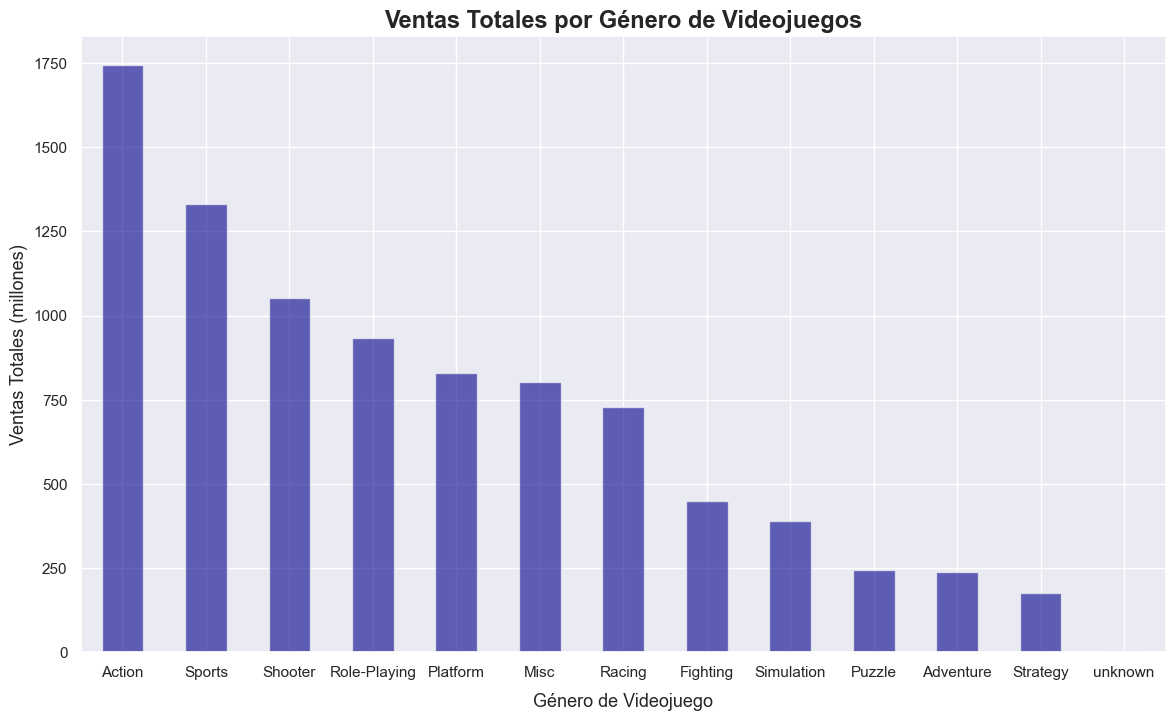

In [36]:
# Visualización de las ventas totales por género
plt.figure(figsize=(14, 8))
sales_by_genre.plot(kind='bar', color='darkblue', alpha=0.6)
plt.title('Ventas Totales por Género de Videojuegos', fontsize=17, fontweight='bold')
plt.xlabel('Género de Videojuego', fontsize=13,labelpad=10)
plt.ylabel('Ventas Totales (millones)',fontsize=13)
plt.xticks(rotation=0)
plt.show()

In [37]:
# Ver las estadísticas básicas de ventas por género
sales_by_genre.describe()

count      13.000000
mean      685.823846
std       503.243809
min         2.420000
25%       242.570000
50%       728.670000
75%       934.560000
max      1744.170000
Name: total_sales, dtype: float64

[Ventas por Género de Videojuegos]

**Generos con mayor rentabilidad:**
- Liderandotelas Action casi llegando a los 1750 millones de ventas, seguido por Sports y Shooters con más de 1000 millones cada uno, Estos géneros destacan por su popularidad reflejado en ventas.

**Generos con mediana rentabilidad:**
- Los RPG, Plataformeros, Misc y Carreras tienen ventas entre 700 y 1,000 millones, atrayendo audiencias específicas pero significativas en ventas.

**Generos con poca rentabilidad:**
- Los Puzzle, Adventure y Strategy tienen menos de 300 millones en ventas, probablemente corresponda a audiencias más pequeñas y lanzamientos menos frecuentes.


# Perfil de Análisis para cada region

## Clasificación por Ventas: NA, EU, JP

[Para cada región: NA (Norteamerica), EU (Europa), JP (Japon)]

In [38]:
# Función para calcular cuota por region de plataformas (5)
def calculate_market_share(region):
    #top_platforms = regional_sales[region].sort_values(ascending=False).head(5)
    top_platforms = regional_sales[region].nlargest(5)  # Seleccionar 5 plataformas
    total_sales = regional_sales[region].sum()  # Ventas totales de la región
    market_share = (top_platforms / total_sales) * 100  # Cuota de mercado (%)
    return top_platforms, market_share


# Función para imprimir los resultados de una región
def region_results(region):
    top_platforms, market_share = calculate_market_share(region)
    
    # Mostrar resultados
    print(f"\nRegión: {region.upper()}")
    print(f"Total de ventas: {regional_sales[region].sum():.2f} millones")
    print("Top 5 plataformas y cuotas de mercado:")
    for platform, sales in top_platforms.items():
        print(f"- {platform}: {sales:.2f} millones ({market_share[platform]:.2f}%)")

In [39]:
# Agrupacion de ventas totales por plataforma en cada región
regional_sales = data_clean.groupby('platform').agg({
    'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'})

# Agrupacion de ventas totales por género en cada región
regional_genre = data_clean.groupby('genre').agg({
    'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'})

# Agrupar por rating ESRB en cada región
esrb_sales = data_clean.groupby('rating').agg({
    'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'})

# DataFrame de cuotas de mercado para plataformas (5) por región
all_regions = ['na_sales', 'eu_sales', 'jp_sales']
market_share_combined = pd.DataFrame()

# Bucle de regiones para cuota de mercado
for region in all_regions:
    top_platforms, market_share = calculate_market_share(region)
    market_share_combined[region] = market_share  # Añadir la cuota de mercado por región

[De as cinco plataformas principales, describiremos las variaciones en sus cuotas de mercado de una región a otra.]

### Top Ventas en Norteamérica y cuota de Mercado 

In [40]:
print(region_results('na_sales')) #Top Ventas en Norteamérica y porcentaje de cuota


Región: NA_SALES
Total de ventas: 4402.35 millones
Top 5 plataformas y cuotas de mercado:
- X360: 602.47 millones (13.69%)
- PS2: 583.84 millones (13.26%)
- Wii: 496.90 millones (11.29%)
- PS3: 393.49 millones (8.94%)
- DS: 382.40 millones (8.69%)
None


**Comentario** 
- Norteamérica lleva el mas alto numero de ventas totales, podría decirse a simple vista que su cuota de mercado es mas significativa.

**En plataformas:** 
- X360 y PS2 lideran la cuota en su region a pesar de ser consolas de generaciones diferentes. DS una consola portátil tiene la menor cuota, podría decirse que en la region las plataformas de sobremesa son mas preferidas.

**En compañías:** 
- varia el porcentaje de cuotas. Liderando Sony (22.20%) por PS2 y PS3, seguidos de Nintendo (19,98) por Wii y DS, y Microsoft (13,69) por X360 el porcentaje mas bajo en comparación.

### Top Ventas en Europa y cuota de Mercado¶

In [41]:
print(region_results('eu_sales')) #Top Ventas en Europa y porcentaje de cuota


Región: EU_SALES
Total de ventas: 2424.67 millones
Top 5 plataformas y cuotas de mercado:
- PS2: 339.29 millones (13.99%)
- PS3: 330.29 millones (13.62%)
- X360: 270.76 millones (11.17%)
- Wii: 262.21 millones (10.81%)
- PS: 213.61 millones (8.81%)
None


**Comentario**
- Europa lleva casi la mitad del numero de ventas totales en comparación con Norteamérica, podría decirse a simple vista que su cuota de mercado es media.

**En plataformas:** 
- PS2 consola de sexta generación lidera la cuota, seguidos de PS3, X360, Wii consolas de séptima generación. Podría decirse la séptima generación tiene la mayor cuota (35,6) y una preferencia significativa solo por plataformas de sobremesa.

**En compañías:** 
- El porcentaje de cuota es el mas alto para Sony (36,42) por PS2, PS3 y PS. Si bien Microsoft y Nintendo tienen relevancia con X360 y Wii, la diferencia de cuota es mayor.

### Top Ventas en Japon y cuota de Mercado

In [42]:
print(region_results('jp_sales')) #Top Ventas en Japon y porcentaje de cuota


Región: JP_SALES
Total de ventas: 1297.37 millones
Top 5 plataformas y cuotas de mercado:
- DS: 175.57 millones (13.53%)
- PS: 139.82 millones (10.78%)
- PS2: 139.20 millones (10.73%)
- SNES: 116.55 millones (8.98%)
- 3DS: 100.67 millones (7.76%)
None


**Comentario** 
- Japón lleva un numero de ventas totales inferior (tercera parte) a comparación con Norteamérica y Europa, podría decirse a simple vista que su cuota de mercado es baja.

**En plataformas:** 
- DS lidera la cuota y 3DS la menor cuota ambas consolas portátiles, seguidos de PS y PS2 consolas de generaciones pasadas, igual que SNES aun mas antigua. Podría decirse que las Portátiles tienen una cuota media (21.29) en la region y mayor presencia de generaciones pasadas.

**En compañías:** 
- El porcentaje de cuota lidera Nintendo (30,27) por DS, SNES y 3DS. Sony (21,51) muestra una presencia en cuota de mercado por PS y PS2 a diferencia de Microsoft que no figura en la region con esta muestra de 5 plataformas.

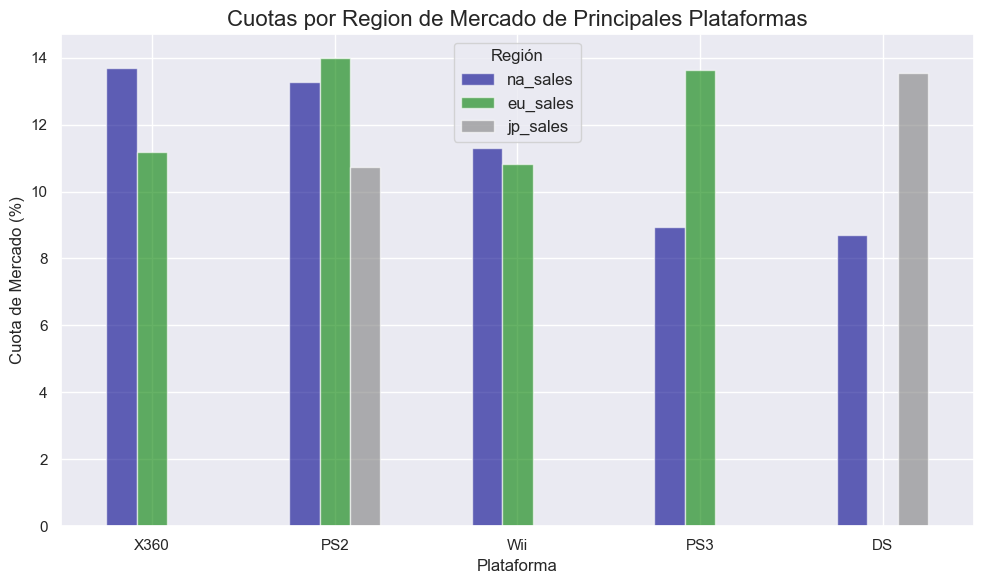

,na_sales,eu_sales,jp_sales
platform,,,
X360,13.685191,11.166880,NaN
PS2,13.262008,13.993244,10.729399
Wii,11.287153,10.814255,NaN
PS3,8.938181,13.622060,NaN
DS,8.686270,NaN,13.532762


In [43]:
# Graficar las cuotas de mercado
market_share_combined.plot(kind='bar', figsize=(10, 6), alpha=0.6, color=['darkblue', 'green', 'grey'])

# Configurar títulos y etiquetas
plt.title('Cuotas por Region de Mercado de Principales Plataformas', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Cuota de Mercado (%)', fontsize=12)
plt.xticks(range(5), market_share_combined.index, rotation=0)
plt.legend(title='Región', fontsize=12)

plt.tight_layout()
plt.show()
market_share_combined

A partir del gráfico de Cuotas por Region de Mercado de Principales Plataformas, podemos sacar las siguientes conclusiones:

**Norteamérica (NA):** 
- Las consolas de sobremesa dominan el mercado, con X360 y PS2 liderando en ventas y cuota de mercado.

**Europa (EU):** 
- La tendencia es similar, aunque con una presencia notable de consolas de generaciones diferentes, como PS2 y PS3.

**Japón (JP):** 
- Las plataformas portátiles, especialmente la DS, son las más populares, y las consolas de generaciones anteriores, como SNES y PS2, también tienen una relevancia significativa.

En general, las consolas de sobremesa son preferidas en NA y EU, mientras que en JP, las portátiles tienen una cuota de mercado más alta, destacando la DS. También se observa que las consolas de generaciones pasadas siguen siendo relevantes, especialmente en JP.

**Datos adicionales por Compañía:**
- En cuanto a las compañías, Sony lidera en términos de cuota de mercado, destacando principalmente con la PS2 y la PS3 en NA y EU, y mostrando una presencia significativa en JP. Nintendo tiene una mayor relevancia en Japón, especialmente con la DS, y se mantiene como un actor fuerte en el mercado global. Por último, Microsoft tiene una presencia moderada en NA con la X360, pero su cuota de mercado es más baja en comparación con Sony y Nintendo en otras regiones.




### Top 5 Generos por Region

In [44]:
top_genres = regional_genre.sum(axis=1).nlargest(5).index # Seleccionar 5 generos

top_genre_sales = regional_genre.loc[top_genres] # Filtrado por region

# Cuota de mercado por género para cada región
genre_market_share = (top_genre_sales / regional_genre.sum()) * 100
genre_market_share

,na_sales,eu_sales,jp_sales
genre,,,
Action,19.966836,21.410336,12.442865
Sports,15.546924,15.539847,10.447290
Shooter,13.452815,13.087967,2.987583
Role-Playing,7.514396,7.782915,27.394652
Platform,10.119595,8.262980,10.084247


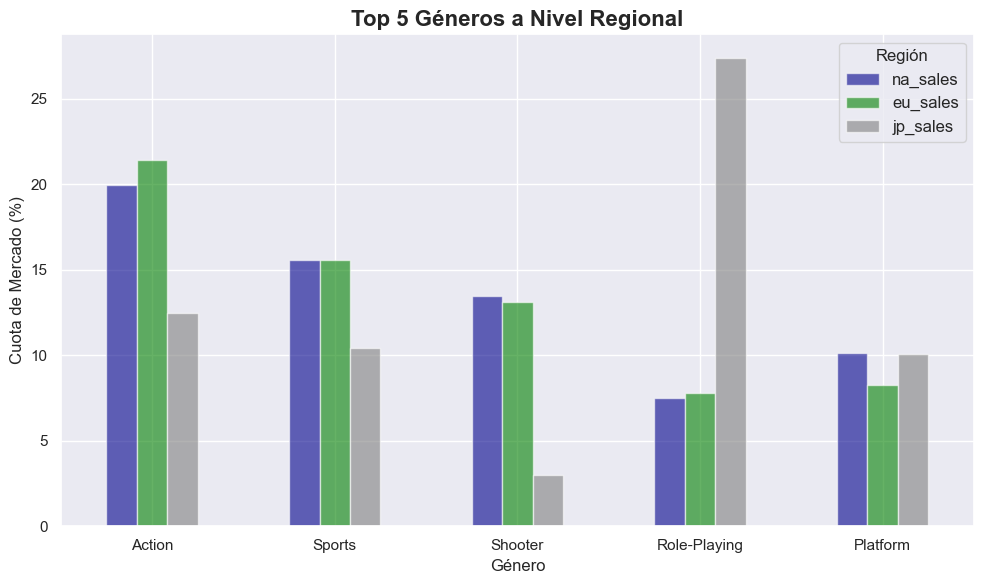

In [45]:
# Graficar cuotas de 5 géneros por región
genre_market_share.plot(kind='bar', figsize=(10, 6), alpha=0.6, color=['darkblue', 'green', 'grey'])

# Configurar títulos y etiquetas
plt.title('Top 5 Géneros a Nivel Regional', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cuota de Mercado (%)', fontsize=12)
plt.xticks(range(len(top_genres)), genre_market_share.index, rotation=0)
plt.legend(title='Región', fontsize=12)

plt.tight_layout()
plt.show()

Los cinco géneros principales a nivel regional son Action, Sports, Shooter, Role-Playing, y Platform, pero su desempeño varía significativamente entre regiones:

**Norteamérica:** 
- El genero Action lidera con casi el 20% de la cuota de mercado, seguido por Sports y Shooter. Esto refleja una popularidad y preferencia por géneros dinámicos y competitivos.

**Europa:** 
- Con similitud a Norteamérica, Action y Sports dominan con cuotas superiores al 15%, pero Shooter también tiene una presencia fuerte, mostrando gustos alineados entre ambas regiones.

**Japón:** 
- El genero Role-Playing destaca como el más popular con una cuota del 27.4%, reflejando una preferencia cultural por la inmersión y experiencias narrativas, a diferencia de los gustos occidentales.

En general, Action es el género más consistente entre regiones, mientras que Japón presenta una clara diferencia con su preferencia por el Role-Playing, lo que podría decirse que marca una diversidad cultural significativa en el mercado.








## Clasificación por ESRB: NA, EU, JP

[Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.]

In [46]:
# Total ventas por region divido en porcentajes de rating ESRB
total_sales = data_clean[['na_sales', 'eu_sales', 'jp_sales']].sum()  # Suma ventas por región
esrb_results = esrb_sales / total_sales * 100  # Dividir y multiplicar por 100 
esrb_results

,na_sales,eu_sales,jp_sales
rating,,,
AO,0.028621,0.025158,0.000000
E,29.370450,29.292646,15.270123
E10+,8.025714,7.775079,3.098576
EC,0.034754,0.004537,0.000000
K-A,0.058151,0.011136,0.112535
M,17.001829,19.960242,4.951556
RP,0.000000,0.003299,0.000000
T,17.257828,17.611881,11.669763
unknown,28.222654,25.316022,64.897446


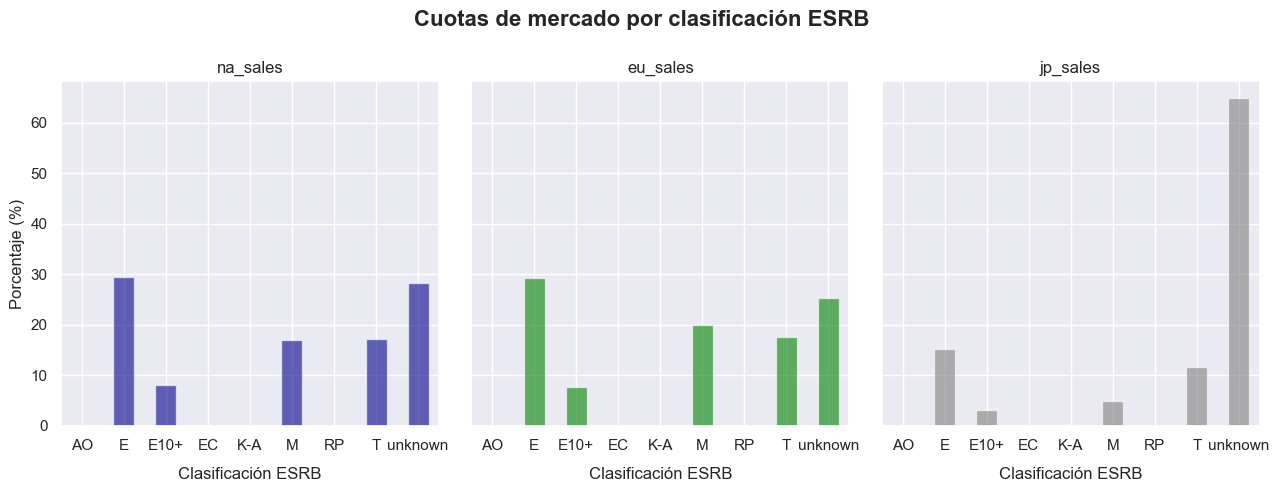

In [47]:
# Crear el gráfico de cuotas de mercado por clasificación ESRB
esrb_results.plot(kind='bar', figsize=(13, 5), subplots=True, layout=(1, 3), sharey=True, legend=False, 
                  color=['darkblue', 'green', 'grey'], alpha=0.6)

# Título principal
plt.suptitle('Cuotas de mercado por clasificación ESRB', fontsize=16, fontweight='bold')

# Configurar los ejes y estilos para cada subgráfico
for ax in plt.gcf().axes:
    ax.set_xlabel('Clasificación ESRB', labelpad=10)
    ax.set_ylabel('Porcentaje (%)')
    ax.tick_params(axis='x', rotation=0)

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.99])  # rect para evitar superposición con el título principal
plt.show()

En función a los gráficos la clasificación ESRB es similar en NA y EU. Tomando en cuenta que unknown representa en su mayoría valores nulos rellenados poderosos definir lo siguiente:

**Norteamérica (NA) y Europa (EU):**
- Las clasificaciones E (Everyone) domina las ventas, alcanzando cerca del 29% en ambas regiones, mostrando una alta preferencia por juegos disponibles para todas las edades.
Los juegos clasificados como T (Teen) y M (Mature) también tienen cuotas importantes (17 y 19%), lo que implica demanda significativa de contenido para adolescentes y adultos.
Clasificaciones menores como E10+ tienen un impacto reducido pero aún da representación a nichos de mercado.

**Japón (JP):**
- La mayoría de las ventas (64.9%) están representadas como unknown, lo que indica una falta significativa de datos sobre las clasificaciones ESRB.
Aunque las ventas de juegos con clasificación E y T tienen cierta presencia, su proporción es mucho menor en comparación con las otras regiones.

Las clasificaciones ESRB parecen influir principalmente en Norteamérica y Europa, donde las etiquetas E, T, y M son representativas de las preferencias de los consumidores. Sin embargo, la categoría unknown, que refleja valores nulos rellenados, limita las conclusiones sobre Japón y destaca la necesidad de información más completa para obtener una visión clara del impacto de estas clasificaciones en esa región.


# Pruebas de hipótesis

## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


In [48]:
# Filtrar datos excluyendo registros con year_of_release asignado a 2099
hyp_data = new_data.query('user_score > 0 & year_of_release != 2099 & (platform == "XOne" or platform == "PC")')
hyp_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,76.0,T,8.01
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,40.0,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,82.0,T,4.83


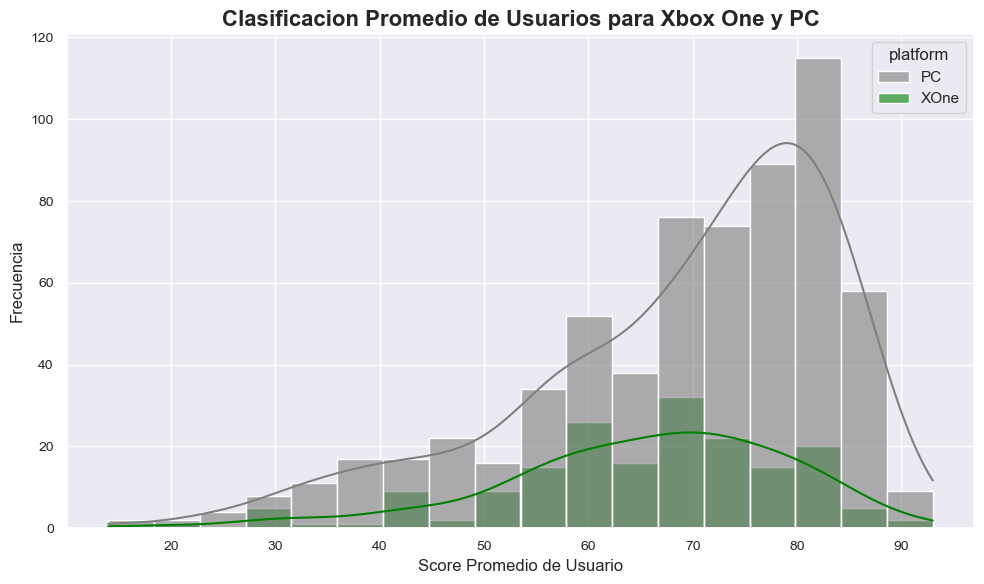

In [49]:
# Graficar distribuciones de puntuaciones por plataforma
plt.figure(figsize=(10, 6))
sns.histplot(hyp_data, x='user_score', hue='platform', kde=True, palette=['grey', 'green'], alpha=0.6)

# Configurar títulos y etiquetas
plt.title('Clasificacion Promedio de Usuarios para Xbox One y PC', fontsize=16, fontweight='bold')
plt.xlabel('Score Promedio de Usuario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [50]:
# promedios
hyp_data.groupby('platform')['user_score'].mean()

platform
PC      68.849379
XOne    65.214286
Name: user_score, dtype: float64

### H0 (Nula) : Las diferencias entre el promedio de score de usuaarios al XOne y PC NO son estadísticamente significativas, es decir son diferentes

### H1 (Alternativa): Las diferencias entre el promedio de score de usuaarios al XOne y PC son estadísticamente significativas, es decir son diferentes

**Motivo:**
Estas hipótesis se formulan para determinar si las plataformas tienen una valoración promedio similar o diferente, basado en la calificación de los usuarios.

In [51]:
xone = hyp_data.query('platform == "XOne"')
pc = hyp_data.query('platform == "PC"')

In [52]:
confidence_intervals = 0.95
alpha = 0.05 - confidence_intervals

### H0 (Nula): La varianza de la plataforma XOne es diferente a la varianza de los de plataforma PC

### H1 (Alternativa): La varianza de la plataforma XOne es igual a la varianza de los de plataforma PC

**Motivo:**
Antes de comparar las medias, es necesario verificar si las varianzas de las dos muestras son homogéneas, ya que esto influye en la elección del método estadístico adecuado (por ejemplo, una prueba t con varianzas iguales o desiguales).

In [53]:
# Prueba de levene verica separacion de varianzas 
p_value_levene = stats.levene(
    xone['user_score'], pc['user_score']
).pvalue

# Mostrar resultado de prueba
print(f"Valor p (levene): {p_value_levene}")

# Evaluar la hipótesis
if p_value_levene < alpha:
    print('Se rechaza la H0 (nula): La varinza de XOne no es igual a la varianza de PC')
else:
    print('No se puede rechazar la H0 (nula): No hay evidencia suficiente para decir que a varianza de XOne y PC no son iguales')

Valor p (levene): 0.2375838763718263
No se puede rechazar la H0 (nula): No hay evidencia suficiente para decir que a varianza de XOne y PC no son iguales


**Criterio de uso de prueba:** En este caso utilizamos la prueba de Levene como para probar las hipótesis, ya que buscábamos evaluar si las varianzas de las calificaciones promedio de usuarios entre Xbox One y PC eran iguales. La prueba de Levene es adecuada en este caso porque compara la igualdad de varianzas de manera robusta, incluso cuando los datos no tienen una distribución normal. Esto seria clave para proceder a usar una prueba t estándar para comparar las medias.

## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### H0 (nula): No hay diferencia significativa entre las calificaciones promedio de los géneros Acción y Deportes.

### H1 (alternativa): Hay una diferencia significativa entre las calificaciones promedio de los géneros Acción y Deportes


In [54]:
# Filtrar datos para los géneros de Acción y Deportes
action_data = data_clean.query('genre == "Action" & user_score > 0')
sports_data = data_clean.query('genre == "Sports" & user_score > 0')

**Motivo:** Para probar estas hipótesis, realizaremos una prueba t de Student para muestras independientes. La razón es que estamos comparando las medias de dos grupos distintos (géneros de videojuegos), y utilizamos esta prueba para verificar si las medias son significativamente diferentes.



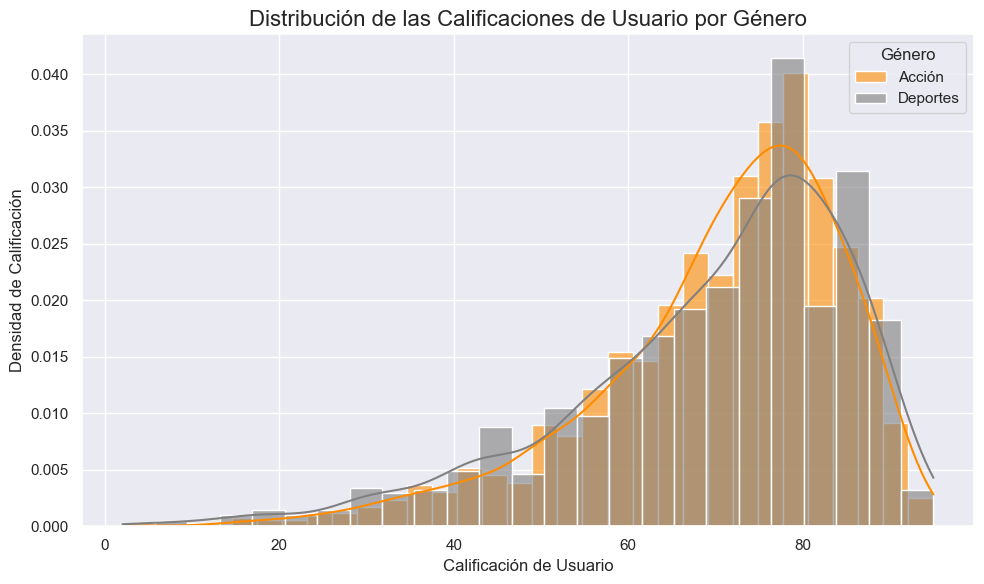

In [55]:
# Crear el gráfico de distribuciones para ambos géneros
plt.figure(figsize=(10, 6))

sns.histplot(action_data['user_score'], color='darkorange', kde=True, label='Acción', stat="density", alpha=0.6)
sns.histplot(sports_data['user_score'], color='grey', kde=True, label='Deportes', stat="density", alpha=0.6)

# Configurar títulos y etiquetas
plt.title('Distribución de las Calificaciones de Usuario por Género', fontsize=16)
plt.xlabel('Calificación de Usuario', fontsize=12)
plt.ylabel('Densidad de Calificación', fontsize=12)
plt.legend(title="Género")

plt.tight_layout()
plt.show()

In [56]:
# Prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)

# Mostrar los resultados de la prueba
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Evaluar la hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print('Se rechaza la H0: Las calificaciones promedio de los géneros Acción y Deportes son significativamente diferentes.')
else:
    print('No se puede rechazar la H0: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.')

Estadístico t: 1.5774679163334975
Valor p: 0.1148381879149927
No se puede rechazar la H0: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.


**Criterio de uso de prueba:** A partir de la prueba t, no se puede afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sean diferentes. Aunque puede haber una diferencia en las calificaciones, estadísticamente no es significativa con el nivel de confianza utilizado (95%).

# Conclusión general

## Conclusiones
**Objetivo:**  
El análisis tuvo como objetivo explorar e identificar patrones y tendencias de ventas de videojuegos en función de plataformas, géneros y regiones, considerando factores como clasificaciones ESRB, calificaciones (score) de usuarios y críticos, y datos históricos de ventas. Para determinar un mayor éxito con compañas futuras.

**Preparación de Datos:**
- En la revisión preliminar del DataFrame se identificaron problemas como nombres de columnas inconsistentes, tipos de datos no acordes, y valores ausentes en múltiples columnas.
- Se implementaron estrategias para manejar los valores ausentes:
    - Columnas de texto, como 'name' y 'genre', fueron rellenadas con 'unknown'.
    - En columna 'year_of_release', se asignó un año superior ficticio (2099) a los valores nulos para evitar interferencias en el análisis.
    - La columna 'rating' también fue rellenada con 'unknown', pero debido a su alto porcentaje de valores faltantes, no se utilizó en análisis profundo.
- Se generaron nuevas columnas para calcular métricas relevantes, como ventas totales por región y crecimiento anual.
  
**Análisis y Visualización Gráfica:** 

- Ventas Totales por Año:
Las ventas de videojuegos crecieron de forma sostenida desde los 2000 hasta alcanzar un pico en 2008-2009, seguido de una disminución hacia 2016.

- Plataformas más populares:
  - PS2, Wii, y X360 lideraron las ventas globales. La Wii destacó por su innovación en tecnológica, mientras que PS2 mantuvo ventas consistentes a lo largo de su ciclo de vida.
  - Las plataformas portátiles, como la DS, mostraron un desempeño sólido en mercados específicos como Japón.

- Géneros de Videojuegos:
    - entables: Action, Sports y Shooter fueron los géneros con mayores ingresos globales.
    - Moderados: RPG y Platform mantuvieron audiencias específicas pero significativas.
    - Bajos: Puzzle y Strategy tuvieron menos relevancia en ventas, posiblemente debido a nichos más pequeños.

- Diferencias Regionales:
    - En Norteamérica y Europa, las consolas de sobremesa dominaron el mercado, con géneros dinámicos como Action y Sports.
    - En Japón, las plataformas portátiles y géneros narrativos como RPG lideraron las preferencias, reflejando diferencias culturales en consumo.
    - Sony lideró en cuotas de mercado global, con Nintendo destacando especialmente en Japón y Microsoft teniendo una presencia moderada.


**Pruebas Estadísticas de Hipótesis:**
- Varianza de Calificaciones entre XOne y PC:
    - No se encontró evidencia estadística significativa para diferencias en la varianza de calificaciones promedio entre las plataformas Xbox One y PC (Prueba de Levene, p = 0.238).
    - Esto permitió usar una prueba t estándar para comparar sus medias, donde tampoco se hallaron diferencias significativas.
- Calificaciones entre Géneros:
    - Al comparar los géneros Action y Sports, la prueba t de Student arrojó un valor p = 0.115, indicando que no hay diferencias estilísticamente significativas en las calificaciones promedio.
      
**Posibles recomendaciones:**

- Estrategias :
    - Priorizar géneros con alta rentabilidad como Action, Shooter y Sports, que podrían maximizar ingresos, como las métricas globales.
    - Considerar desarrollo en genero RPG para audiencias en Japón, ya que son altamente populares en esta región.
    - Considerar el desarrollo en clasificación E para maximizar el alcance global.
      
- Foco Regional:
    - Enfocarse en consolas de sobremesa para los mercados de Norteamérica y Europa.
    - Aprovechar la preferencia por portátiles en Japón, desarrollando contenido exclusivo para estas plataformas. Tomando en cuenta la generación actual.

- Campañas Publicitarias:
    - Enfocar los esfuerzos en consolas de última generación (PS4 y XOne), destacando las características innovadoras que pueden atraer a una amplia base de usuarios.
    - Para juegos M (Mature) o T (Teen), diseñar estrategias personalizadas que resalten elementos clave como narrativa o gráficos.
    -  Trabajar en la recopilación de datos más completos sobre clasificaciones en Japón para mejorar estrategias de segmentación.
  

Este análisis sugiere que el éxito de los videojuegos depende de la innovación tecnológica, el enfoque en preferencias regionales, y estrategias diferenciadas para maximizar el rendimiento en plataformas, mercados clave.

